# Image Gradients

*OpenCV provides three types of gradient filters or High-pass filters, <b>Sobel, Scharr and Laplacian</b>. We will see each one of them.*

## 1. Sobel and Scharr Derivatives

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively).<br> You can also specify the size of kernel by the argument ksize.If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.

The derivative of a matrix is calculated by an operator called the Laplacian, in honor of Laplace, a famous mathematician.




Unfortunately the partial derivatives can not be solved analytically but must be treated with the numerical calculation using approximations.<b> So if you want to calculate a Laplacian, you will need to calculate first two derivatives, called derivatives of Sobal, each of which takes into account the gradient variations in a certain direction: one horizontal, the other vertical.</b>

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

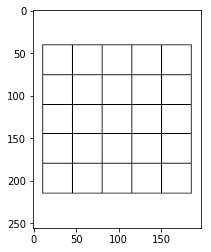

In [52]:
img=cv2.imread('assets/grid.png')
plt.imshow(img,cmap='gray')

### Horizontal Sobal derivative (Sobal x)

It is obtained through the convolution  * of the image I with a matrix  $ G_{x} called kernel which has always odd size. The kernel with size 3 is the simplest case:

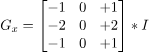

'\nddepth means desired depth of the destination image\n\nIt has information about what kinds of data stored in an image, \nand that can be unsigned char (CV_8U), signed char (CV_8S), unsigned short (CV_16U), and so on...\n'

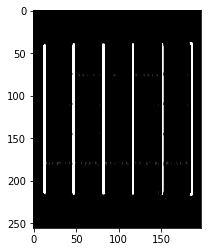

In [57]:

sobx=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
plt.imshow(sobx,cmap='gray')

'''
ddepth means desired depth of the destination image

It has information about what kinds of data stored in an image, 
and that can be unsigned char (CV_8U), signed char (CV_8S), unsigned short (CV_16U), and so on...
'''

### Vertical Sobal derivative (Sobal x)

Vertical Sobal derivative (Sobal y). It is obtained through the convolution * of the image I with a matrix $ G_{y} $ called kernel which has always odd size.


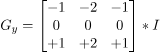

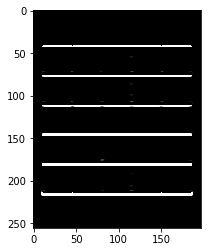

In [56]:
soby=cv2.Sobel(img,cv2.CV_8U,dx=0,dy=1,ksize=5)
plt.imshow(soby,cmap='gray')

### Combining the Sobel along both X and Y directions we get :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


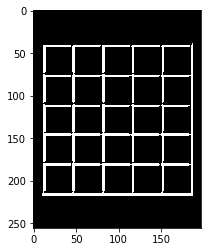

In [38]:
res=cv2.add(sobx,soby)
plt.imshow(res,cmap='gray')

## Using the Laplacian Function

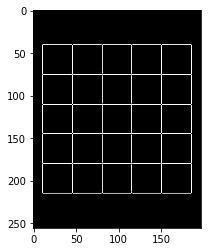

In [53]:
lap=cv2.Laplacian(img,cv2.CV_8U)
plt.imshow(lap,cmap='gray')

# IMPORTANT NOTE

In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that.<b> Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value)</b>. So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. 

### Original

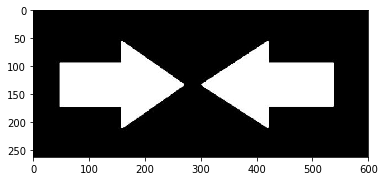

In [65]:
img=cv2.imread('assets/blackandwhite.jpg',0)
plt.imshow(img,cmap='gray')

### Using Sobel with Unsigned-Integer( np.uint8 / CV_8U )

   As you can see below by using uint8 we are unable to recognize multiple edges for both horizontal and vertical directions.<b>So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.
    

Along X


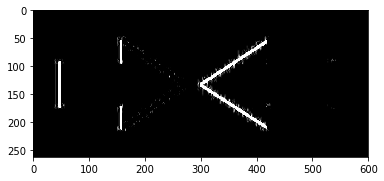

Along Y


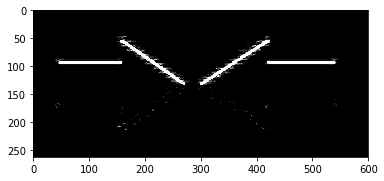

In [75]:
sobx=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
soby=cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

print('Along X')
plt.imshow(sobx,cmap='gray')
plt.show()
print('Along Y')
plt.imshow(soby,cmap='gray')
plt.show()


## Converting data to a higher type
   
   As you can observe the lost edges in the above images along X and Y directions are retained respectively.

Along X


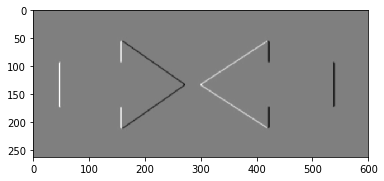

Along Y


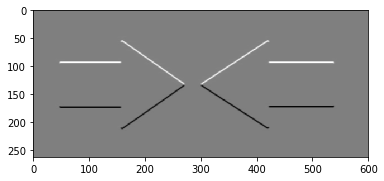

In [76]:
sobx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
soby=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

print('Along X')
plt.imshow(sobx,cmap='gray')
plt.show()
print('Along Y')
plt.imshow(soby,cmap='gray')
plt.show()

## Reverting to lower dtype without edge loss

   But this seems to be on a overlay of gray.To convert it to a Black/White image we need to retain the negative gradients too.We can do this by <b>taking the asbolute values and then converting the datatype tp uint8</b>.Demonstrated below :

In [78]:
#Taking absolute values for sob in float 64 form and then converting to uint8
sobx8 = np.uint8(np.absolute(sobx))
soby8 = np.uint8(np.absolute(soby))

Along X


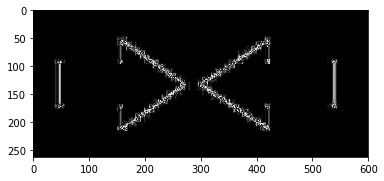

Along Y


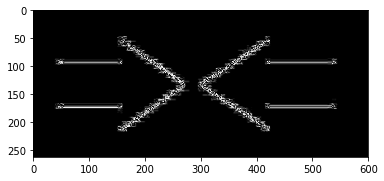

In [79]:

print('Along X')
plt.imshow(sobx8,cmap='gray')
plt.show()
print('Along Y')
plt.imshow(soby8,cmap='gray')
plt.show()

## END